In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [15]:
dataset=pd.read_csv("../Data-processed/crop_recommendation.csv")

In [16]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
dataset.shape

(2200, 8)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [19]:
df=dataset

In [20]:
df.duplicated().sum()

0

In [21]:
df.columns=['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH','Rainfall','Label']

In [22]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Label          0
dtype: int64

In [23]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#from surprise import Dataset, Reader

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [28]:
!pip install xgboost

   ---------------------------------------- 99.8/99.8 MB 3.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


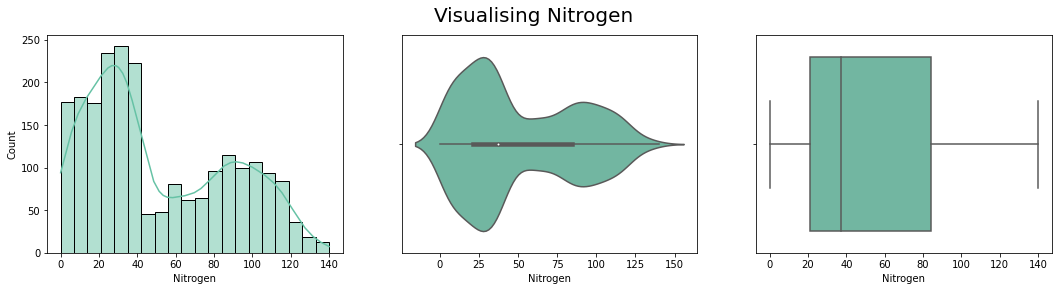

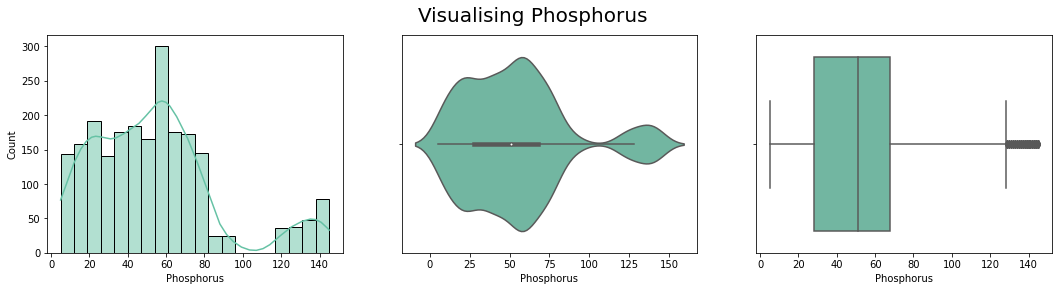

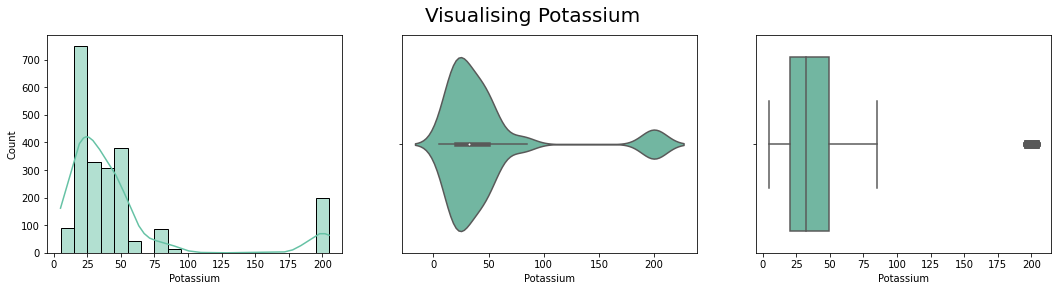

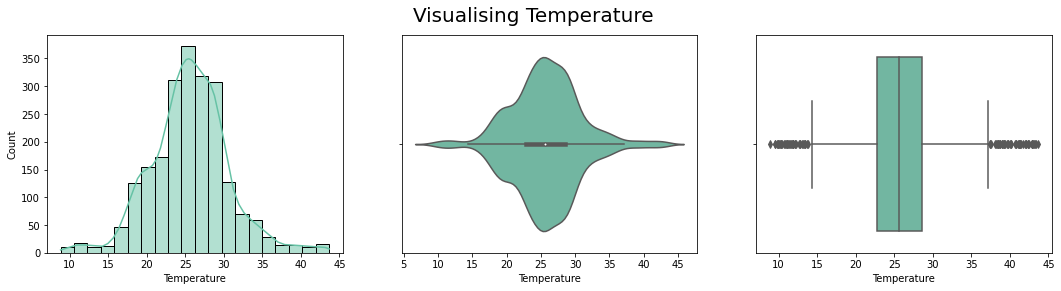

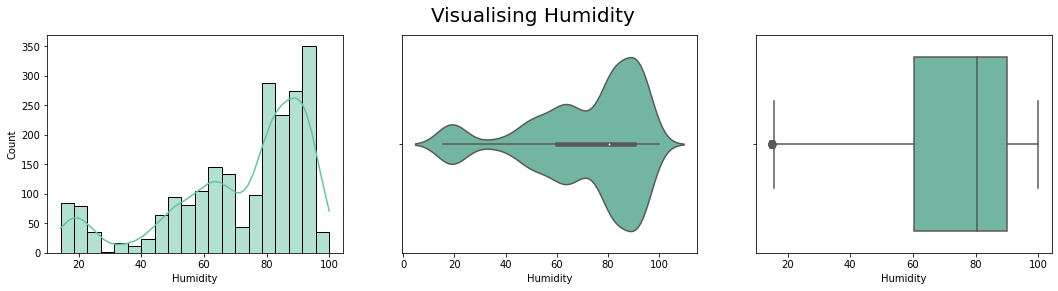

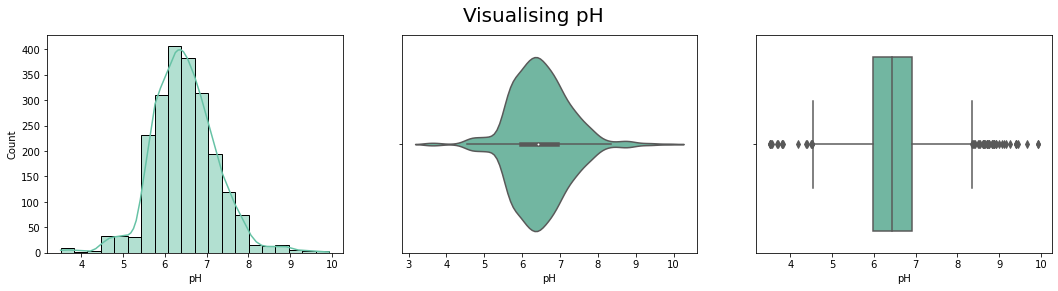

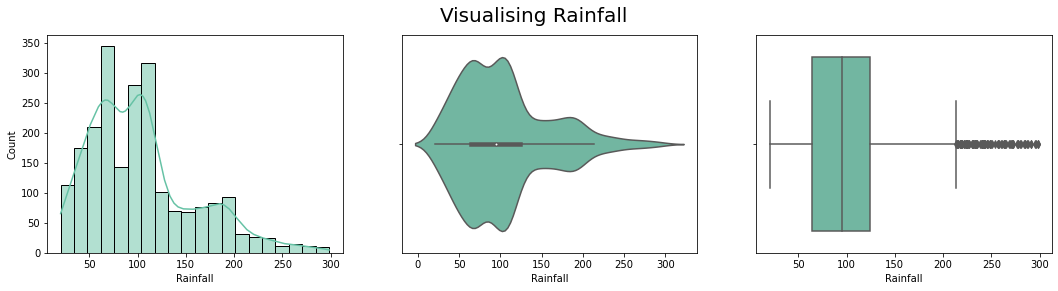

In [26]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20, ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualising {i}',size=20)

In [33]:
grouped=df.groupby(by='Label').mean().reset_index()
grouped

,Label,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [34]:
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops;')
    for j,k in grouped.sort_values(by=i, ascending=False)[:5][['Label',i]].values:
        print(f'{j} -->{k}')
    print(f'***************************************')

Top 5 Most Nitrogen requiring crops;
cotton -->117.77
coffee -->101.2
muskmelon -->100.32
banana -->100.23
watermelon -->99.42
***************************************
Top 5 Most Phosphorus requiring crops;
apple -->134.22
grapes -->132.53
banana -->82.01
lentil -->68.36
chickpea -->67.79
***************************************
Top 5 Most Potassium requiring crops;
grapes -->200.11
apple -->199.89
chickpea -->79.92
watermelon -->50.22
muskmelon -->50.08
***************************************
Top 5 Most Temperature requiring crops;
papaya -->33.7238587388
mango -->31.2087701513
blackgram -->29.9733396789
muskmelon -->28.663065756
mungbean -->28.5257747353
***************************************
Top 5 Most Humidity requiring crops;
coconut -->94.84427180610001
papaya -->92.4033876826
muskmelon -->92.34280196089999
apple -->92.3333828756
orange -->92.17020876340001
***************************************
Top 5 Most pH requiring crops;
chickpea -->7.33695662374
blackgram -->7.13395162948
o

In [35]:
for i in grouped.columns[1:]:
    print(f'Top 5 least {i} requiring crops:')
    for j,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} -->{k}')
    print(f'*************************************')

Top 5 least Nitrogen requiring crops:
lentil -->18.77
pomegranate -->18.87
orange -->19.58
mango -->20.07
pigeonpeas -->20.73
*************************************
Top 5 least Phosphorus requiring crops:
orange -->16.55
coconut -->16.93
watermelon -->17.0
muskmelon -->17.72
pomegranate -->18.75
*************************************
Top 5 least Potassium requiring crops:
orange -->10.01
blackgram -->19.24
lentil -->19.41
cotton -->19.56
maize -->19.79
*************************************
Top 5 least Temperature requiring crops:
chickpea -->18.8728467519
kidneybeans -->20.1150846851
pomegranate -->21.837841721999997
maize -->22.3892039102
apple -->22.6309424132
*************************************
Top 5 least Humidity requiring crops:
chickpea -->16.8604394237
kidneybeans -->21.6053567295
pigeonpeas -->48.0616330847
mango -->50.1565726953
mothbeans -->53.16041802790001
*************************************
Top 5 least pH requiring crops:
kidneybeans -->5.749410585870001
mango -->5.7663

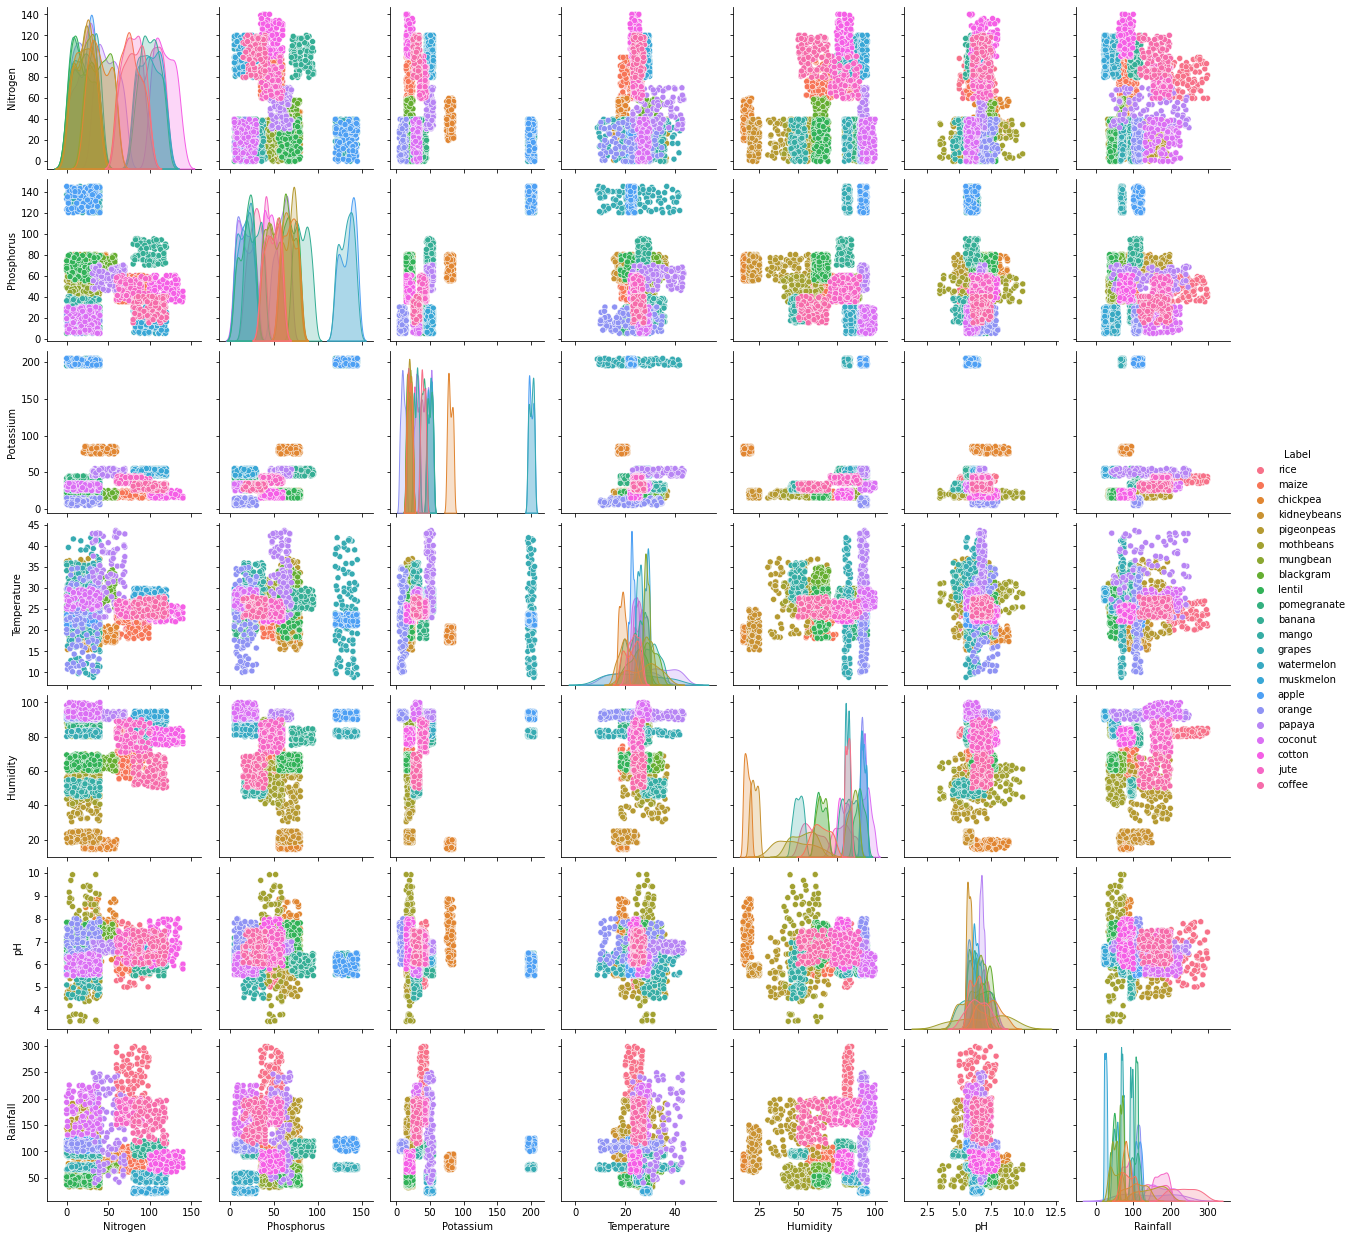

In [36]:
sns.pairplot(data=df,hue='Label')
plt.show()

In [37]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.fillna(0, inplace=True)
# numeric_df=df.drop(['Label'],axis=1)

<AxesSubplot:>

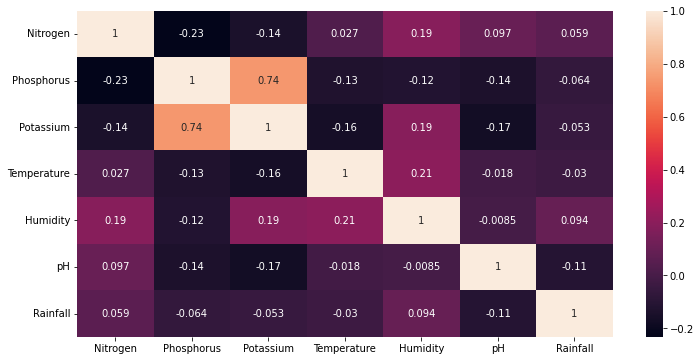

In [38]:
figure=plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),annot=True,)

In [39]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['Label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig=px.scatter(x=df_pca[0],y=df_pca[1],color=df['Label'],title='Decomposed using PCA')
fig.show()

In [40]:
pca2=PCA(n_components=3)
df_pca2=pca2.fit_transform(df.drop(['Label'],axis=1))
df_pca2=pd.DataFrame(df_pca2)
fig=px.scatter_3d(x=df_pca2[0],y=df_pca2[1],z=df_pca2[2],color=df['Label'],title="Variance ecplained;")
fig.show()

In [41]:
fig = px.scatter (x=df['Nitrogen'],y=df['Phosphorus'],color=df['Label'],title="Nitrogen VS phosphorus")
fig.show()

In [42]:
fig=px.scatter(x=df['Phosphorus'],y=df['Potassium'],color=df['Label'],title='Phosphorus VS Potassium')
fig.show ()

In [43]:
names=df['Label'].unique()
encoder =LabelEncoder()
df['Labels']=encoder.fit_transform(df['Label'])
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label,Labels
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [44]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label,Labels
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [45]:
x=df.drop(['Labels'],axis=1)
x=x.drop(['Label'], axis=1)
# x=df.iloc[:, :7].values
y=df['Labels']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)

In [46]:
print(x)

      Nitrogen  Phosphorus  Potassium  Temperature   Humidity        pH  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall  
0     202.935536  
1     226.655537  
2     263.964248  
3     242.864034  
4   

In [47]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtrain=pd.DataFrame(xtrain,columns=x.columns)
xtrain.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
0,-0.814149,-0.822608,-0.417587,0.291827,-1.109147,-1.008501,-0.114763
1,-0.599794,-0.552511,-0.398019,0.560394,-0.839739,0.640464,-0.212948
2,0.230832,-0.282414,-0.495859,-0.149479,-0.081354,-0.978596,-0.459356
3,0.766720,0.707944,0.012910,0.102227,0.348272,-1.243260,0.198403
4,0.230832,0.047706,-0.084930,-0.507217,0.482624,1.775630,2.914674


In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)

In [49]:
xtrain.shape

(1980, 7)

In [50]:
xtest.shape

(220, 7)

In [51]:
xtrain

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
361,24,67,22,20.120043,22.898456,5.618844,104.625215
1117,26,37,30,35.399863,49.459626,6.166174,97.410540
1182,12,27,26,29.093823,45.566106,5.323072,96.235200
1891,21,20,31,25.600337,99.724010,5.855458,165.824873
1710,58,51,47,42.134740,91.704454,6.757471,197.402901
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(xtrain,ytrain)
    ypred = md.predict(xtest)
    
    print(f"{name}  with accuracy : {accuracy_score(ytest,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 1.0
Support Vector Machine  with accuracy : 0.9727272727272728
K-Nearest Neighbors  with accuracy : 0.9772727272727273
Decision Tree  with accuracy : 0.990909090909091
Random Forest  with accuracy : 1.0
Bagging  with accuracy : 0.9954545454545455
AdaBoost  with accuracy : 0.08636363636363636
Gradient Boosting  with accuracy : 0.990909090909091
Extra Trees  with accuracy : 0.8954545454545455


In [56]:
#From the Above Accuracies, We have adopt Random Forest as it has Maximum Accuracy
classifier=BaggingClassifier()
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)

In [58]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    prediction = classifier.predict(features).reshape(1,-1)
    
    return prediction[0] 

In [59]:
N = 40
P = 50
k = 50
temperature = 40.0
humidity = 20
ph = 100
rainfall = 100

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Muskmelon is a best crop to be cultivated 


In [60]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier2V.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()